In [2]:
import pandas as pd
df = pd.read_csv('final_different_MCTS_param.csv')
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,total_requests,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM
0,0.993631,2023,2,25,585.782051,53.923077,1,2,1,False,...,157,3,5,6,6,60,100,900,900,5000
1,0.993631,2023,2,25,588.666667,45.147436,1,2,1,False,...,157,3,5,6,6,60,100,900,900,1000
2,1.000000,2023,2,25,590.751592,38.305732,0,2,1,False,...,157,3,5,6,6,60,100,900,900,500
3,0.986301,2023,2,27,646.870370,95.439815,3,2,1,False,...,219,3,5,6,6,60,100,900,900,500
4,0.931507,2023,2,27,671.313725,178.593137,15,2,1,False,...,219,3,5,6,6,60,100,900,900,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.933702,2023,2,28,599.508876,96.621302,12,2,1,True,...,181,3,5,6,6,60,100,900,900,1200
68,0.939227,2023,2,28,616.370588,89.629412,11,2,1,True,...,181,3,5,6,6,60,100,900,900,800
69,0.944751,2023,2,28,609.947368,118.105263,10,2,1,True,...,181,3,5,6,6,60,100,900,900,800
70,0.944751,2023,2,28,620.058480,118.105263,10,2,1,True,...,181,3,5,6,6,60,100,900,900,1200


In [3]:
df['combined'] = df.apply(lambda row: f"{row['mode']}_{row['cost_mode']}_{row['IMPERFECT_GENERATIVE_MODEL']}_{row['BETTER_GEN_MODEL']}", axis=1)
df
mapping = {'1_1_False_False': 'greedy',
 '2_1_False_False': 'perfect',
 '2_1_True_True': 'imperfect_ours',
 '2_1_True_False': 'imperfect_baseline',
 }


# Rename the values in the 'combined' column based on the mapping
df['combined'] = df['combined'].map(mapping)
df = df.sort_values(by='combined')
# Display the DataFrame to verify the changes
df

,serviced ratio,year,month,day,Average Passenger Wait Time at the origin station,Average Passenger Wait Time inside the bus,rejected_requests,mode,cost_mode,IMPERFECT_GENERATIVE_MODEL,...,num_buses,K_max,MCTS_depth,N_chains,Timeout,iterations,Max wait time at station,Max wait time inside bus,MCTS_TUNING_PARAM,combined
35,0.944751,2023,2,28,609.947368,118.105263,10,2,1,True,...,3,5,6,6,60,100,900,900,1000,imperfect_baseline
28,1.000000,2023,2,26,571.641791,14.701493,0,2,1,True,...,3,5,6,6,60,100,900,900,5000,imperfect_baseline
32,0.928177,2023,2,28,621.988095,126.761905,13,2,1,True,...,3,5,6,6,60,100,900,900,5000,imperfect_baseline
33,0.944751,2023,2,28,634.064327,122.894737,10,2,1,True,...,3,5,6,6,60,100,900,900,500,imperfect_baseline
70,0.944751,2023,2,28,620.058480,118.105263,10,2,1,True,...,3,5,6,6,60,100,900,900,1200,imperfect_baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.972376,2023,2,28,628.994318,98.829545,5,2,1,False,...,3,5,6,6,60,100,900,900,500,perfect
20,1.000000,2023,2,26,581.701493,23.873134,0,2,1,False,...,3,5,6,6,60,100,900,900,5000,perfect
19,1.000000,2023,2,26,576.992537,18.783582,0,2,1,False,...,3,5,6,6,60,100,900,900,1000,perfect
55,1.000000,2023,2,26,586.052239,19.350746,0,2,1,False,...,3,5,6,6,60,100,900,900,1600,perfect


In [4]:
import pandas as pd

column = 'MCTS_TUNING_PARAM'

import numpy as np
grouped_df = df.groupby([column, 'combined']).median().reset_index()
pivot_df = grouped_df.pivot(index=column, columns='combined', values='serviced ratio')
pivot_df['baseline_improvement'] = ((pivot_df['imperfect_ours'] / pivot_df['imperfect_baseline']) - 1)

o = pivot_df['imperfect_ours']
t = pivot_df['imperfect_baseline']
p = pivot_df['perfect']
pivot_df['theoretical maxiumum'] = (o-t)/(p-t) 
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x < 0 else x)
pivot_df['theoretical maxiumum'] = pivot_df['theoretical maxiumum'].apply(lambda x: np.nan if x > 1 else x)


final_table = pivot_df[['imperfect_baseline', 'imperfect_ours', 'perfect', 'baseline_improvement', 'theoretical maxiumum']]

# Function to format floats to 4 significant figures
def format_float(x):
    return f"{100*x:.4g}" if isinstance(x, (float, np.floating)) else x

# Apply the formatting function to the entire DataFrame
final_table = final_table.applymap(format_float)

# Convert to LaTeX table
latex_table = final_table.to_latex(index=False, escape=False)

# Save the LaTeX table to a file
with open('table.tex', 'a') as f:
    f.write(latex_table)

final_table

combined,imperfect_baseline,imperfect_ours,perfect,baseline_improvement,theoretical maxiumum
MCTS_TUNING_PARAM,,,,,
500,98.13,97.45,99.32,-0.698,nan
800,96.99,97.45,99.09,0.4708,21.78
1000,97.45,97.86,98.31,0.4193,47.23
1200,97.22,97.17,98.31,-0.04936,nan
1600,97.86,97.63,98.63,-0.2333,nan
5000,96.99,96.76,96.92,-0.2354,nan


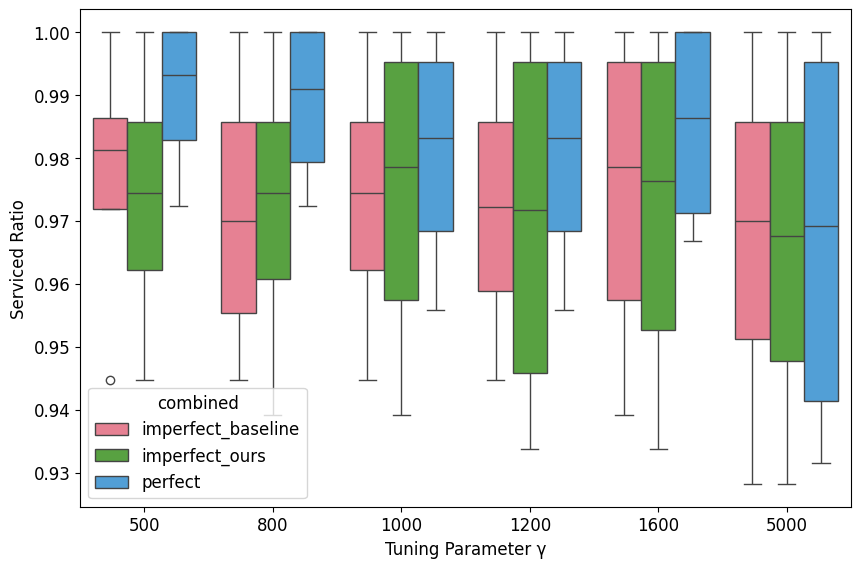

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'combined', 'MCTS_TUNING_PARAM', and 'serviced ratio'

# Set the font size
plt.rcParams.update({'font.size': 12})

# Calculate figure size
a4_length_mm = 297
half_a4_length_mm = a4_length_mm / 2
half_a4_length_inches = half_a4_length_mm / 25.4  # Convert mm to inches
figure_width = half_a4_length_inches * 1.5  # Adjust width to maintain aspect ratio

# Create a boxplot with the new figure size
plt.figure(figsize=(figure_width, half_a4_length_inches))
sns.boxplot(x='MCTS_TUNING_PARAM', y='serviced ratio', hue='combined', data=df, palette='husl')

# Set labels and title
plt.xlabel('Tuning Parameter γ')
plt.ylabel('Serviced Ratio')
# plt.title('Serviced Ratio by Combined and MCTS Tuning Parameter')

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Save the plot with DPI 300
plt.savefig('/home/igorsadalski/Desktop/igor_master_theis/final_results/main_different_MCTS.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()